# Handwritten digits classification using neural network



We will classify handwritten digits using simple neural network which has only input and output layers.

In [98]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
# Load Dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [100]:
len(X_train)

60000

In [101]:
len(X_test)

10000

In [102]:
X_train[0].shape


(28, 28)

In [103]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

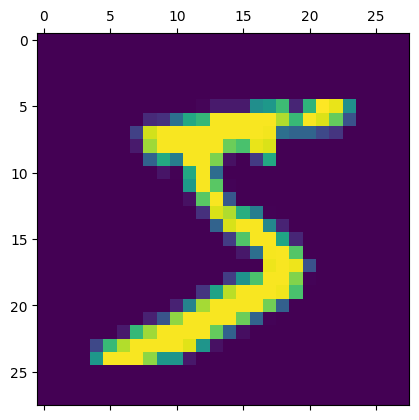

In [104]:
plt.matshow(X_train[0])

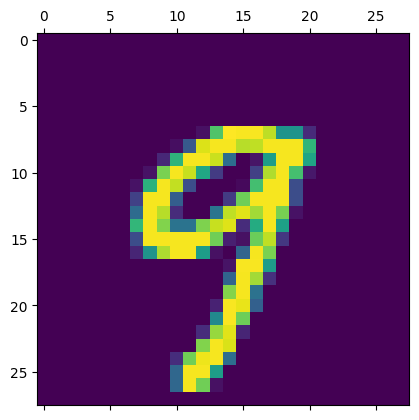

In [105]:
plt.matshow(X_train[45])

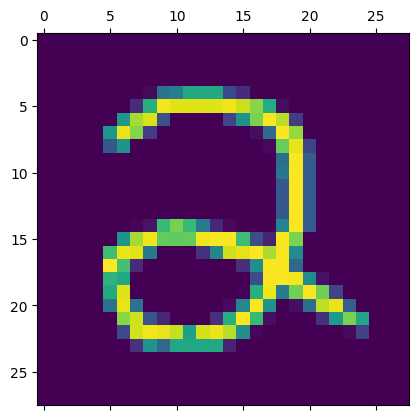

In [106]:
plt.matshow(X_train[2454])

In [107]:
y_train[2]

4

In [108]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [109]:
X_train.shape

(60000, 28, 28)

In [110]:
#Scaling - Scaling is a technique that improves the accuracy of
# machine learning models.

X_train = X_train/255
X_test = X_test/255

In [111]:
X_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [112]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattend = X_test.reshape(len(X_test), 28*28)

X_test_flattend.shape

(10000, 784)

In [113]:
X_train_flattened.shape

(60000, 784)

In [114]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [115]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation = 'sigmoid')
])

In [116]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [117]:
model.fit(X_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4693 - accuracy: 0.8781
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9153
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2835 - accuracy: 0.9215
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9237
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9257
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2622 - accuracy: 0.9270
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2581 - accuracy: 0.9285
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2552 - accuracy: 0.9290
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2533 - accuracy: 0.9293
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.250

In [118]:
model.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2624 - accuracy: 0.9271


[0.2623702883720398, 0.9271000027656555]

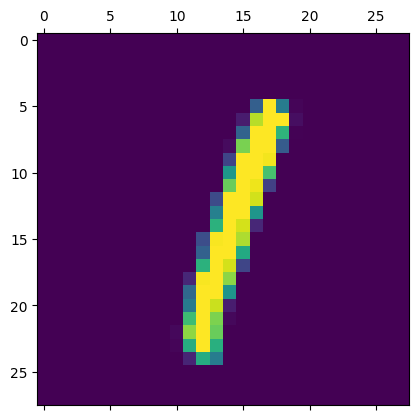

In [119]:
plt.matshow(X_test[5])

In [120]:
y_predicted = model.predict(X_test_flattend)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([3.3734450e-03, 1.1749169e-08, 1.4788436e-02, 9.6669632e-01,
       1.1246894e-03, 1.0938681e-01, 3.2246728e-08, 9.9983966e-01,
       8.1675448e-02, 6.2117451e-01], dtype=float32)

In [121]:
# argmax find the maximum value and print the index of that value.
np.argmax(y_predicted[5])

1

In [122]:
np.argmax(y_predicted[5])

1

In [123]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [124]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [125]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted.argmax(axis=1))
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    7,    6,    2,    2,    1],
       [   0, 1113,    4,    2,    0,    1,    4,    2,    9,    0],
       [   4,    8,  938,   16,    7,    3,   10,    8,   35,    3],
       [   1,    0,   20,  931,    0,   16,    2,   11,   22,    7],
       [   1,    1,    8,    2,  916,    0,    8,    6,   10,   30],
       [   7,    2,    3,   43,    8,  763,   15,    8,   36,    7],
       [  11,    3,   11,    1,    7,   13,  907,    1,    4,    0],
       [   1,    6,   24,    5,    5,    1,    0,  956,    3,   27],
       [   5,    6,    7,   24,    9,   20,    9,   12,  875,    7],
       [   9,    7,    1,   10,   24,    5,    0,   31,    8,  914]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

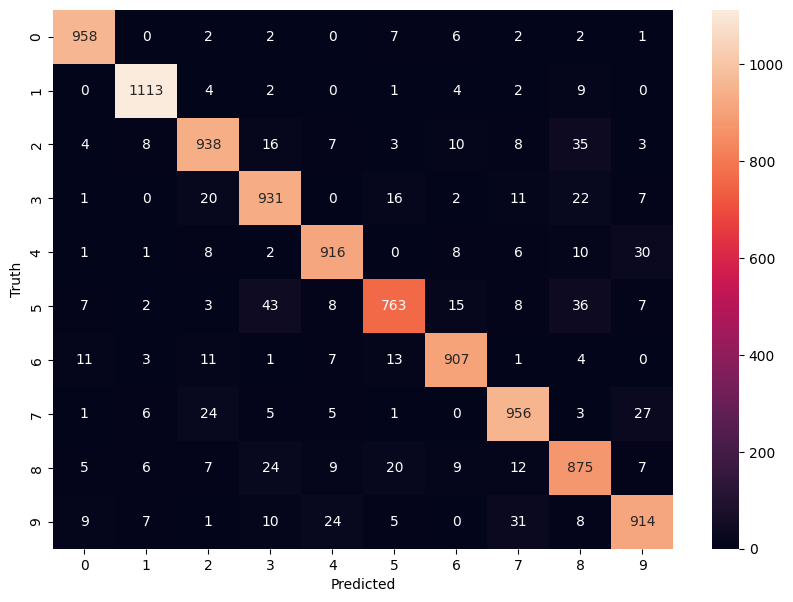

In [126]:
# For visualization using seaborn

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [127]:
# For hidden layer (Add hidden layers for more accuracy)
# We will add  a hidden layer and see how the performance of the model improves.
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2618 - accuracy: 0.9247
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1125 - accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0789 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0585 - accuracy: 0.9816
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0464 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0359 - accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0294 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0224 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0202 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.

In [128]:
model.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0801 - accuracy: 0.9777


[0.08008178323507309, 0.9776999950408936]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

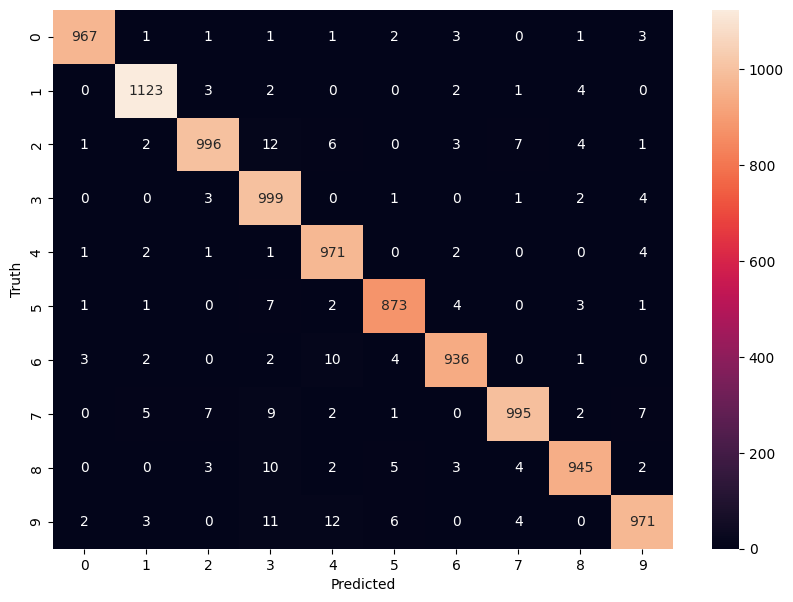

In [129]:
y_predicted = model.predict(X_test_flattend)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [130]:
# Using flatten layer so that we don't have to call .reshape on input dataset

In [131]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2759 - accuracy: 0.9213
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1260 - accuracy: 0.9626
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0881 - accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0662 - accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0522 - accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0418 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0345 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0283 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0231 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.020

In [132]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1004 - accuracy: 0.9742


[0.1003577932715416, 0.9742000102996826]